# **Data import and normalization**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import dbscan 

In [ ]:
df = pd.read_excel("SAS_data_no_outliers.xlsx", index_col=0)
df.head()

,Phone,Email,NumOrders,AvgSum,FullSum,AvgQuantity,AvgDiscount,Oneclick,Cancels,Actions,...,Упаковка,Встраиваемые духовые шкафы (VIP),Товары для автолюбителей,Ванная,Индивидуальные виды спорта,Сушильные машины,Встраиваемые микроволновые печи (VIP),Аккумуляторы,Садовая мебель,Автоаудио
0,55575449-54535553535073,56666668112117_pu26@yanded.ru,1,2420.0,2420.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0,0,0
1,55574954-53565052504871,551120117_xu11@bk.ru,1,8999.0,8999.0,1.0,2000.0,0.0,0.0,1.0,...,0.0,0,0.0,0.0,0.0,0,0,0,0,0
2,55575049-51505248534972,5566664122117_zu16@hotbox.ru,1,1790.0,1790.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0,0,0
3,55574954-53495654564877,0,1,1420.0,1420.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0,0,0
5,55575456-52485253545172,53110109_nm16@gmail.com,1,3498.0,3498.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0,0,0,0


In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# **PCA**

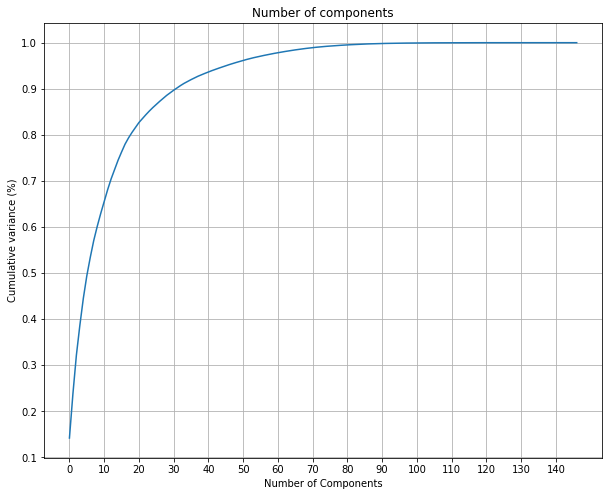

In [ ]:
pca = PCA()
pca.fit(norm_df)
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(range(0, 147), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, 147, step=10))
plt.yticks(np.arange(.1, 1.1, step=0.1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title("Number of components")
plt.grid()
plt.show()

In [ ]:
pca = PCA(n_components=12, random_state=30)
pca.fit(norm_df)
pca_df = pca.fit_transform(norm_df)

# **K-Means**

## Determine number of clusters

### Elbow method

In [ ]:
distances = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=33)
    kmeans.fit(pca_df)
    distances.append(kmeans.inertia_)

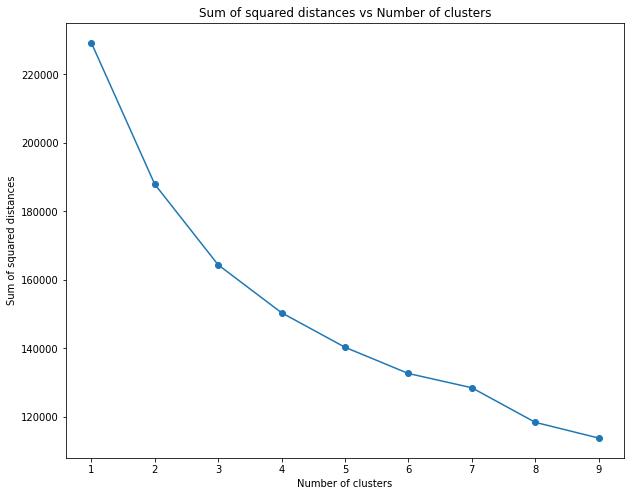

In [ ]:
plt.plot(range(1, 10), distances, label="Distances")
plt.scatter(range(1, 10), distances)
plt.xticks(range(1, 10))
plt.title("Sum of squared distances vs Number of clusters")
plt.ylabel("Sum of squared distances")
# plt.vlines(7,ymin=5000, ymax=80000, linestyles='dashed', label="Elbow")
# plt.ylim(120000, 260000)
plt.xlabel("Number of clusters")
plt.show()

Метод локтя предполагает, что оптимальное количество кластеров составляет 5 или 6.

### Silhouette coefficient

In [ ]:
silhouette = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=33)
    kmeans.fit(pca_df)
    silhouette.append(silhouette_score(pca_df, kmeans.labels_))

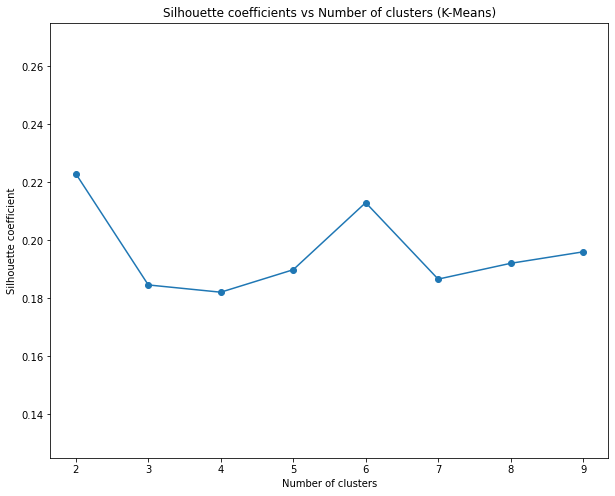

In [ ]:
plt.plot(range(2, 10), silhouette, label="Silhouette coefficient")
plt.scatter(range(2, 10), silhouette)
plt.xticks(range(2, 10))
plt.title("Silhouette coefficients vs Number of clusters (K-Means)")
plt.ylabel("Silhouette coefficient")
plt.xlabel("Number of clusters")
plt.ylim(0.125, 0.275)
plt.show()

Для метода коэффициента силуэта оптимальным количеством кластеров является 2, однако 6 показывают довольно схожие результаты.

### Pie charts

In [ ]:
def calculate_share(labels, n):
    share = []
    for i in range(n):
        share.append(len(labels[labels==i])/len(labels))
    return share

In [ ]:
kmeans_2 = KMeans(n_clusters=2, random_state=33)
kmeans_2.fit(pca_df)
labels_2 = kmeans_2.labels_
share_2 = calculate_share(labels_2, 2)

kmeans_6 = KMeans(n_clusters=6, random_state=33)
kmeans_6.fit(pca_df)
labels_6 = kmeans_6.labels_
share_6 = calculate_share(labels_6, 6)

kmeans_8 = KMeans(n_clusters=8, random_state=33)
kmeans_8.fit(pca_df)
labels_8 = kmeans_8.labels_
share_8 = calculate_share(labels_8, 8)

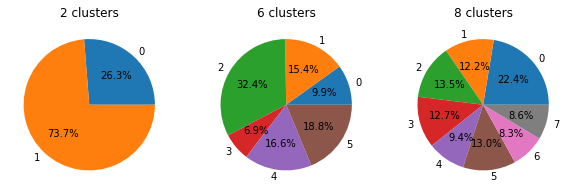

In [ ]:
fig, axs = plt.subplots(1, 3)
axs[0].pie(share_2, labels=np.unique(labels_2), autopct='%1.1f%%')
axs[0].set_title("2 clusters")
axs[1].pie(share_6, autopct='%1.1f%%', labels=np.unique(labels_6))
axs[1].set_title("6 clusters")
axs[2].pie(share_8, autopct='%1.1f%%', labels=np.unique(labels_8))
axs[2].set_title("8 clusters")
plt.show()

Исходя из всех приведенных выше графиков, мы решили, что оптимальное количество кластеров равно 6.

## Perform K-Means

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=33)
kmeans.fit(pca_df)

KMeans(n_clusters=6, random_state=33)

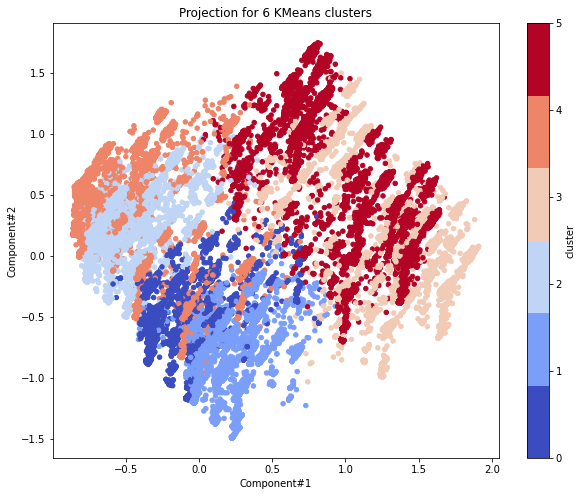

In [ ]:
plt.scatter(pca_df[:,0], pca_df[:,1], c=kmeans.labels_, s=20, cmap=plt.cm.get_cmap('coolwarm', 6));
plt.title('Projection for {} KMeans clusters'.format(6))
plt.xlabel('Component#1')
plt.ylabel('Component#2')
plt.colorbar(ticks=[i for i in range(6)], label='cluster')
plt.show()

In [ ]:
df['Cluster'] = kmeans.labels_
df.head()

,Phone,Email,NumOrders,AvgSum,FullSum,AvgQuantity,AvgDiscount,Oneclick,Cancels,Actions,...,Встраиваемые духовые шкафы (VIP),Товары для автолюбителей,Ванная,Индивидуальные виды спорта,Сушильные машины,Встраиваемые микроволновые печи (VIP),Аккумуляторы,Садовая мебель,Автоаудио,Cluster
0,55575449-54535553535073,56666668112117_pu26@yanded.ru,1,2420.0,2420.0,1.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,4
1,55574954-53565052504871,551120117_xu11@bk.ru,1,8999.0,8999.0,1.0,2000.0,0.0,0.0,1.0,...,0,0.0,0.0,0.0,0,0,0,0,0,5
2,55575049-51505248534972,5566664122117_zu16@hotbox.ru,1,1790.0,1790.0,1.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,1
3,55574954-53495654564877,0,1,1420.0,1420.0,1.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,2
5,55575456-52485253545172,53110109_nm16@gmail.com,1,3498.0,3498.0,2.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0,0,0,0,5


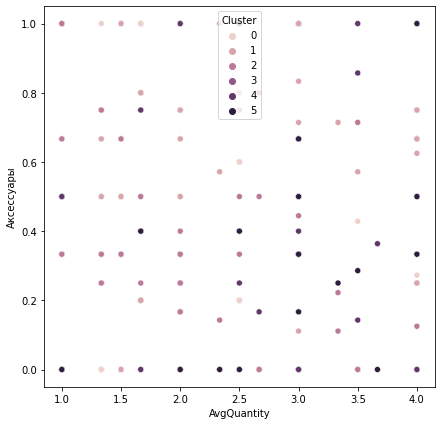

In [ ]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='AvgQuantity', y='Аксессуары', data=df, hue='Cluster')

In [ ]:
groups = df.groupby(['Cluster']).mean()
groups

,NumOrders,AvgSum,FullSum,AvgQuantity,AvgDiscount,Oneclick,Cancels,Actions,LastOrderWeek,Moscow,...,Упаковка,Встраиваемые духовые шкафы (VIP),Товары для автолюбителей,Ванная,Индивидуальные виды спорта,Сушильные машины,Встраиваемые микроволновые печи (VIP),Аккумуляторы,Садовая мебель,Автоаудио
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.081855,6317.220010,6841.073893,1.093940,93.082328,0.076315,0.005343,0.146045,12.918737,0.000000,...,0.000000,0.000000,0.000000,0.000118,0.000118,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.082304,6601.450493,7104.639458,1.141342,80.029583,0.065408,0.010615,0.131096,12.918002,0.998131,...,0.000000,0.000000,0.000076,0.000076,0.000076,0.000000,0.000000,0.000076,0.000000,0.000000
2,1.106292,7806.802559,8661.269133,1.107333,111.044436,0.101645,0.008415,0.141295,12.908155,0.000710,...,0.000018,0.000000,0.000235,0.000018,0.000307,0.000000,0.000036,0.000000,0.000036,0.000036
3,1.047077,11849.314470,12395.153525,1.159670,17.425702,0.140607,0.026966,0.682982,12.919443,0.596703,...,0.000000,0.000000,0.000000,0.000510,0.000680,0.000000,0.000000,0.000170,0.000000,0.000000
4,1.075081,7398.890659,7917.279387,1.135230,162.531988,0.004261,0.004531,0.184557,12.848218,0.187773,...,0.000035,0.000000,0.000176,0.000117,0.000070,0.000070,0.000000,0.000070,0.000000,0.000000
5,1.046557,11384.859010,11939.713951,1.193309,171.510801,0.071887,0.002375,0.764248,13.035058,0.457432,...,0.000000,0.000062,0.000094,0.000135,0.000187,0.000062,0.000000,0.000000,0.000000,0.000000


На основе таблицы сверху можно описать кластеры следующим образом:

1. 0 кластер - Покупатели в большинстве из Санкт-Петербурга. Использует самовывоз и платят наличными. Имеют средние показатели по скидке и самую низку сумму заказа, чаще всего покупают мелкую бытовую технику и тв-аудио.
1. 1 кластер -  покупатели из Москвы, это второй по средней сумме заказа кластер. Люди в 10% случаях оформляют отмену, забирают товары самовывозом и платят наличными при получении. Преимущественно покупают аксессуары.
1. 2 кластер - имеет самый большой показетель в частоте покупок(Покупатели приходят повторно). Покупатели преимущественно из других городов. Почти всегда забирают товар самовывозом и платят наличными при получении. Самыми популярными товарами явлются "Сделай Сам" и Фитнес.
1. 3 кластер - Самая большая выручка из всех кластеров и самое большое количество товаров в чеке 1-2. Самая низкая скидка из всех. Покупатели преимущественно из Москвы, но в немалых долях и из других городов. Реже всех оформляют онлайн-резерв и чаще всех звонят в колл-центр. Заказывают Курьерской доставкой и платят как картой так и наличными, но чаще наличными. Чаще всего покупают крупную бытовую технику, холодильное оборудование и мебель.
1. 4 кластер - Покупатели преимущественно из других городов. Имеют средние показатели в цене заказа и скидке. Часто делают онлайн-резерв. Забирают заказы самовывозом и платят картой при получении.Чаще всего покупают аксессуары и круаную бытовую технику.
1. 5 кластер - Имеет большую среднюю сумму заказа. Самая большую скидку средки всех покупателей. Больше всего действий совершается с товарами. Покупатели из всех городов и чаще всех делают онлайн-резерв. Заказывают товар Курьерской доставкой  и платят чаще всего наличными. Самыми популярные Категории товаров - мебель, крупные бытовые товары и детские игрушки.




# **DBSCAN**

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns

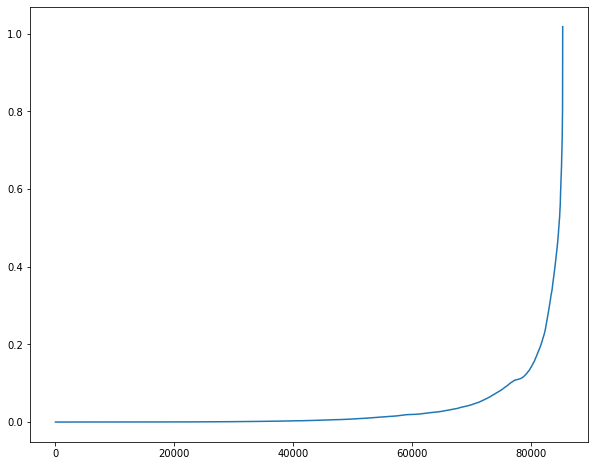

In [ ]:
#find value for epsilon
neigh = NearestNeighbors(n_neighbors=24)
nbrs = neigh.fit(pca_df)
distances, indices = nbrs.kneighbors(pca_df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

Выполним DBSCAN с эпсилоном, равным 0.2 (см. выше) и минимальными выборками, равными 2 * размерность набора данных (24).


In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=24,)
clustering_labels = dbscan.fit_predict(pca_df)

In [ ]:
silhouette_score(pca_df, clustering_labels)

0.29122049156383334

Как мы видим, коэффициент силуэта для DBSCAN значительно лучше, чем для K-means.

In [ ]:
clus = np.unique(clustering_labels)
shares = []
for i in clus:
    shares.append(len(clustering_labels[clustering_labels==i])/len(clustering_labels))

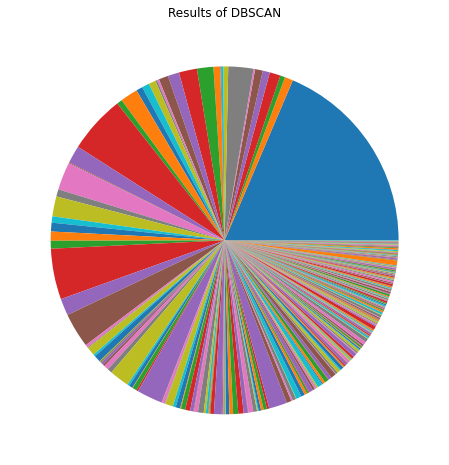

In [ ]:
plt.pie(shares)
plt.title("Results of DBSCAN")
plt.show()

In [ ]:
len(shares)

280

В результате работы DBSCAN получается 200+ кластеров, где один кластер составляет примерно 20%, а другие кластеры очень малы. Интерпретировать такие кластеры невозможно, поэтому DBSCAN не очень подходит для нашей задачи.

# **RFM**

In [ ]:
df = pd.read_excel("SAS_data_no_outliers.xlsx", index_col=0)

In [ ]:
rfm_df = df[['Phone', 'LastOrderWeek', 'NumOrders', 'FullSum']]

In [ ]:
score_1 = np.full((1, 28504), 1)
score_2 = np.full((1, int(rfm_df.shape[0] * 0.333)), 2)
score_3 = np.full((1, int(rfm_df.shape[0] * 0.333)), 3)

In [ ]:
scores = np.hstack((score_1, score_2, score_3)).flatten()
scores

array([1, 1, 1, ..., 3, 3, 3])

In [ ]:
rfm_df = rfm_df.sort_values(by=['LastOrderWeek'])
rfm_df['r_score'] = scores
rfm_df

,Phone,LastOrderWeek,NumOrders,FullSum,r_score
0,55575449-54535553535073,9,1,2420.0,1
7873,55574852-56525156525079,9,1,3660.0,1
7874,55574950-55575350525572,9,1,1389.0,1
7875,55574854-55485048575177,9,1,1950.0,1
7876,55575655-50555255485370,9,1,9019.0,1
...,...,...,...,...,...
83676,55574952-545153485155725,17,1,12490.0,3
83675,55575057-56495454544971,17,1,9999.0,3
83674,55575453-51575551485075,17,1,35330.0,3
83672,55575053-48505757555570,17,1,22790.0,3


In [ ]:
rfm_df['f_score'] = rfm_df['NumOrders']
rfm_df = rfm_df.sort_values(by=['FullSum'])
rfm_df['m_score'] = scores
rfm_df = rfm_df.sort_values(by=['LastOrderWeek', 'NumOrders', 'FullSum'])
rfm_df

,Phone,LastOrderWeek,NumOrders,FullSum,r_score,f_score,m_score
9385,55574853-564957515451705,9,1,300.0,1,1,1
3670,55575054-54514850484975,9,1,300.0,1,1,1
2250,55574853-54565657495079,9,1,310.0,1,1,1
2069,55574949-57485448484870,9,1,310.0,1,1,1
3470,55574851-495248504952745,9,1,310.0,1,1,1
...,...,...,...,...,...,...,...
56271,55574955-52535053484872,17,3,57778.0,3,3,3
38086,55574953-535249535457795,17,3,62939.0,3,3,3
73123,55574853-555257535248795,17,3,68840.0,3,3,3
77221,55574952-535357575649735,17,3,70056.0,3,3,3


Выполним kmeans, используя только оценки RFM.

In [ ]:
distances = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=33)
    kmeans.fit(rfm_df.iloc[:,4:])
    distances.append(kmeans.inertia_)

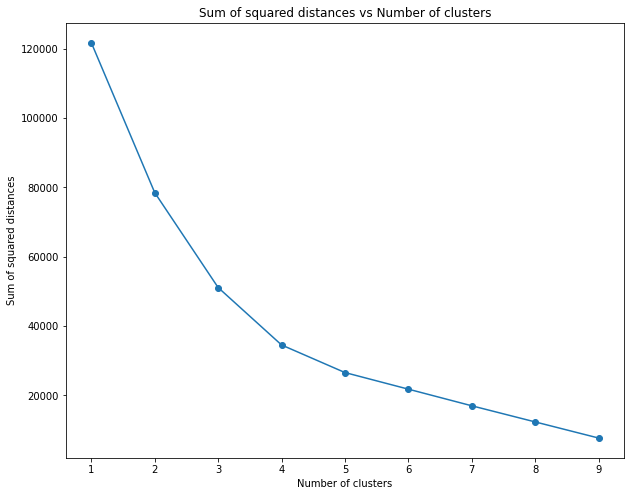

In [ ]:
plt.plot(range(1, 10), distances, label="Distances")
plt.scatter(range(1, 10), distances)
plt.xticks(range(1, 10))
plt.title("Sum of squared distances vs Number of clusters")
plt.ylabel("Sum of squared distances")
plt.xlabel("Number of clusters")
plt.show()

Оптимальное количество кластеров - 4.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=33)
kmeans.fit(rfm_df.iloc[:,4:])
rfm_df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


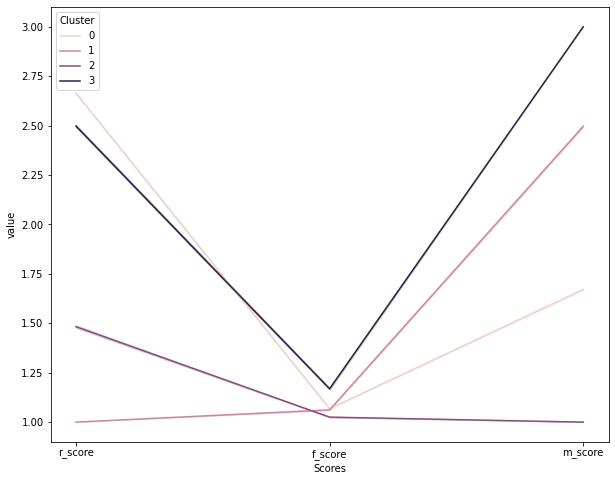

In [ ]:
melted = pd.melt(rfm_df.reset_index(), id_vars=['Phone', 'Cluster'],
                 value_vars=['r_score', 'f_score', 'm_score'], var_name='Scores')
sns.lineplot('Scores', 'value', hue='Cluster', data=melted)
plt.show()

In [ ]:
rfm_groups = rfm_df.groupby(['Cluster']).mean()
rfm_groups

,LastOrderWeek,NumOrders,FullSum,r_score,f_score,m_score
Cluster,,,,,,
0,14.929082,1.067923,4368.477390,2.664400,1.067923,1.671059
1,9.926800,1.062013,12270.822841,1.000000,1.062013,2.496154
2,11.343716,1.025252,1719.429848,1.482913,1.025252,1.000000
3,14.446303,1.168673,19909.564315,2.497994,1.168673,3.000000


Мы можем интерпретировать кластеры следующим образом:


1.   Кластер "0" - новые клиенты, купили что-то недавно, и пока имеют высокую ценность из-за недавней покупки и траты.
2.   Кластер "1" - клиенты, которых мы рискуем потерять, они совершали покупки довольно давно и потратили много денег.
3.   Кластер "2" - потерянные или почти потерянные клиенты, у них нет недавних заказов, частота и денежная ценность самые низкие.
4.   Кластер "3" - лучшие покупатели, они совершали покупки недавно, имеют наибольшую частоту и денежную стоимость.

